In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
import pdb
import matplotlib.pyplot as plt
import h5py    
import pandas as pd

import sklearn


import seaborn as sns
print(sns.__version__)
import plotly.express as px

0.12.2


In [54]:
data_path = "/Users/marchuertascompany/Documents/data/CEERS/DenseBasis/"
ceers_cat = pd.read_csv(data_path+"CEERS_DR05_adversarial_asinh_3filters_Feb-02-2023_4class_shuffle_10_50_DenseBasis.csv")
candels_ceers = pd.read_csv(data_path+"CANDELS_CEERS_match_DR05_december_ensemble_galfit.csv")

In [55]:
filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = ceers_cat.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        ceers_cat[m+'_'+f+'_mean']=c.mean(axis=1).values
        ceers_cat[m+'_'+f+'_std']=c.std(axis=1).values


filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = candels_ceers.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        candels_ceers[m+'_'+f+'_mean']=c.mean(axis=1).values
        candels_ceers[m+'_'+f+'_std']=c.std(axis=1).values        
#print(c.mean(axis=1))
#print(c.std(axis=1))
#c=ceers_cat[ceers_cat.name.str.match('sph*f200w')]
#print(c.columns)

In [56]:





morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f356w_mean,ceers_cat.disk_f356w_mean,ceers_cat.irr_f356w_mean,ceers_cat.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
ceers_cat['morph_flag_f356w']=np.array(morph_flag)
ceers_cat['delta_f356']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f200w_mean,ceers_cat.disk_f200w_mean,ceers_cat.irr_f200w_mean,ceers_cat.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f200w']=np.array(morph_flag)
ceers_cat['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f444w_mean,ceers_cat.disk_f444w_mean,ceers_cat.irr_f444w_mean,ceers_cat.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f444w']=np.array(morph_flag)
ceers_cat['delta_f444']=np.array(delta_value)

ceers_cat.to_csv(data_path+"CEERS_DR05_adversarial_asinh_3filters_1122_4class_ensemble_v02_stellar_params_morphflag_delta_10points_DenseBasis.csv")

In [11]:
print(ceers_cat.DEC)

0        52.952023
1        52.986189
2        52.976250
3        52.973819
4        52.973690
           ...    
24402    52.777875
24403    52.761306
24404    52.766932
24405    52.758949
24406    52.774663
Name: DEC, Length: 24407, dtype: float64


In [162]:
morph_flag=[]

for fsph,fdk,firr in zip(candels_ceers.F_SPHEROID,candels_ceers.F_DISK,candels_ceers.F_IRR):
    
     if (fsph>=0.66 and fdk<0.66 and firr<0.1):
        morph_flag.append(0)
     elif (fsph<0.66 and fdk>=0.66 and firr<0.1):
        morph_flag.append(1)
     elif (firr>=0.1):
        morph_flag.append(2)   
     elif (fsph>0.66 and fdk>0.66 and firr<0.1):
        morph_flag.append(3)            
     else:
        morph_flag.append(-1)  
    
candels_ceers['morph_CANDELS']=np.array(morph_flag)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f356w_mean,candels_ceers.disk_f356w_mean,candels_ceers.irr_f356w_mean,candels_ceers.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
candels_ceers['morph_flag_f356w']=np.array(morph_flag)
candels_ceers['delta_f356']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f200w_mean,candels_ceers.disk_f200w_mean,candels_ceers.irr_f200w_mean,candels_ceers.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
candels_ceers['morph_flag_f200w']=np.array(morph_flag)
candels_ceers['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f444w_mean,candels_ceers.disk_f444w_mean,candels_ceers.irr_f444w_mean,candels_ceers.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
candels_ceers['morph_flag_f444w']=np.array(morph_flag)
candels_ceers['delta_f444']=np.array(delta_value)


candels_ceers.to_csv(data_path+"CANDELS_CEERS_match_DR05_december_ensemble_morphflag_galfit.csv")

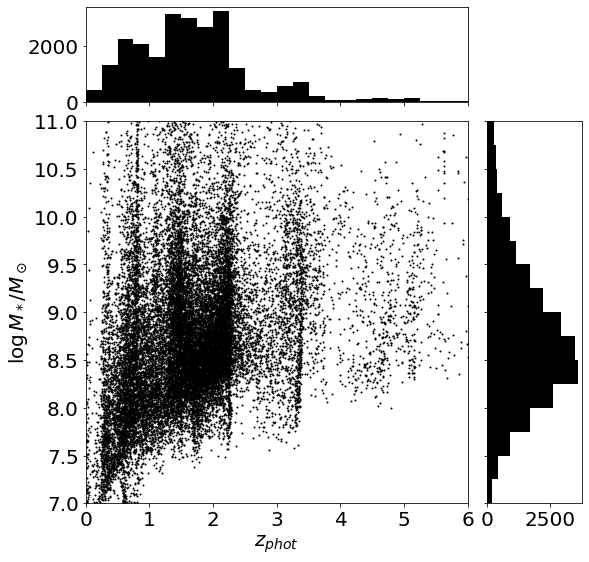

In [61]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(ceers_cat.zfit_50, ceers_cat.logM_50, ax, ax_histx, ax_histy,[0,6],[7,11])



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

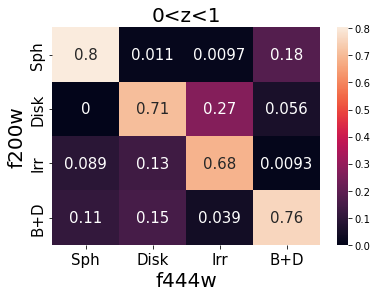

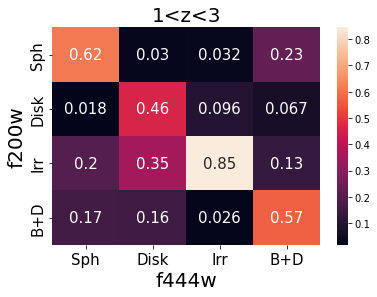

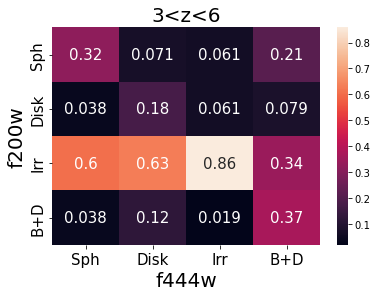

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+" and zfit_50<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_flag_f444w,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444.png")
    plt.show()
   

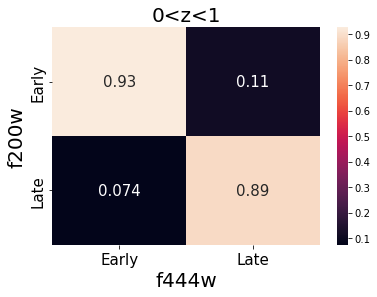

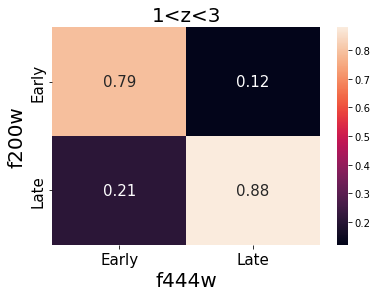

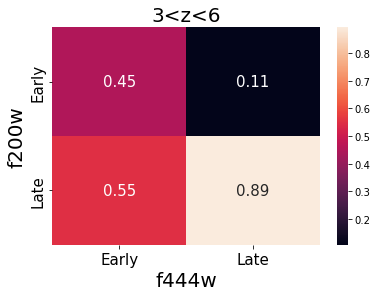

In [37]:



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+" and zfit_50<"+str(zup))
    ceers_morph_f200 = sel.morph_flag_f200w.values
    ceers_morph_f200[ceers_morph_f200==3]=0
    ceers_morph_f200[ceers_morph_f200==2]=1

    ceers_morph_f444 = sel.morph_flag_f444w.values
    ceers_morph_f444[ceers_morph_f444==3]=0
    ceers_morph_f444[ceers_morph_f444==2]=1

    cm = confusion_matrix(ceers_morph_f200, ceers_morph_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444_2class.png")
    plt.show()
    

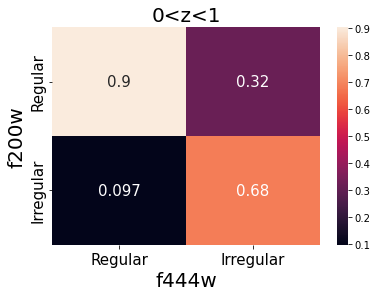

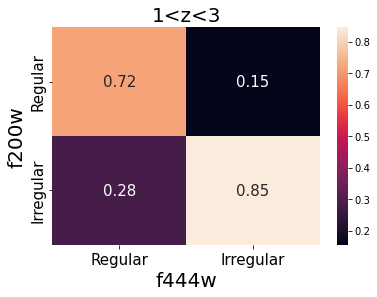

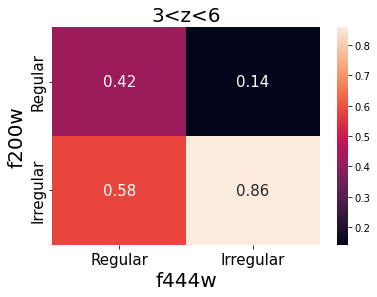

In [47]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+" and zfit_50<"+str(zup))
    ceers_morph_f200 = sel.morph_flag_f200w.values
    ceers_morph_f200[ceers_morph_f200==3]=0
    ceers_morph_f200[ceers_morph_f200==1]=0
    ceers_morph_f200[ceers_morph_f200==2]=1

    ceers_morph_f444 = sel.morph_flag_f444w.values
    ceers_morph_f444[ceers_morph_f444==3]=0
    ceers_morph_f444[ceers_morph_f444==1]=0
    ceers_morph_f444[ceers_morph_f444==2]=1

    cm = confusion_matrix(ceers_morph_f200, ceers_morph_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Regular","Irregular"],fontsize=15); ax.yaxis.set_ticklabels(["Regular","Irregular"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444_2class.png")
    plt.show()

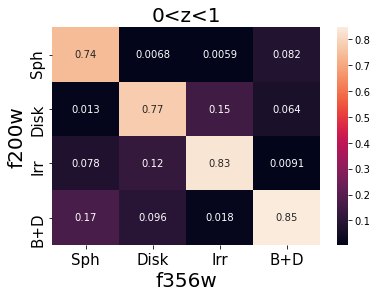

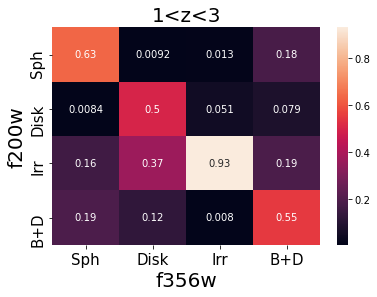

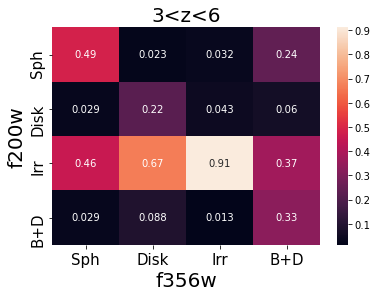

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("logM_50>9.5 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_flag_f356w,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f356w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f356.png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

[957 528 309 182 113  39]
[0.00714496 0.00824668 0.03600976 0.05636452 0.09846917 0.19700962]
[0.01375369 0.01826847 0.06107762 0.09748163 0.16701755 0.36709294]
[4876 2812 1301  601  391  174]
[0.00391735 0.005522   0.01399244 0.05450084 0.1648491  0.14093549]
[0.00592678 0.00870275 0.02136497 0.07528286 0.20855244 0.2038921 ]
[540 543 426 198  99  27]
[0.00957699 0.02533584 0.0220527  0.04744671 0.13006964 0.25324898]
[0.02005264 0.04096251 0.03898017 0.08386642 0.2133647  0.48749177]


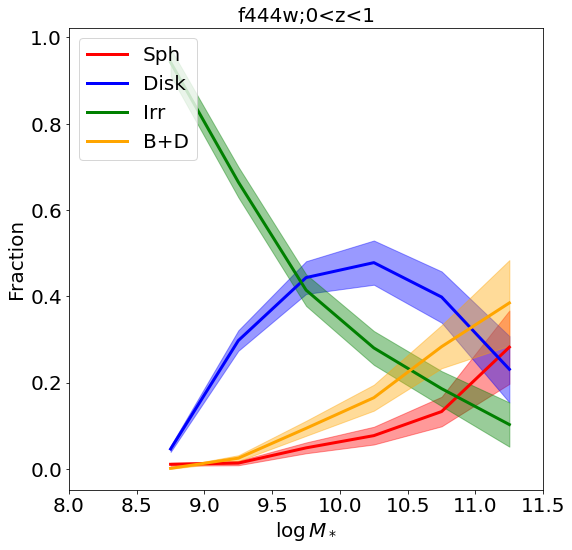

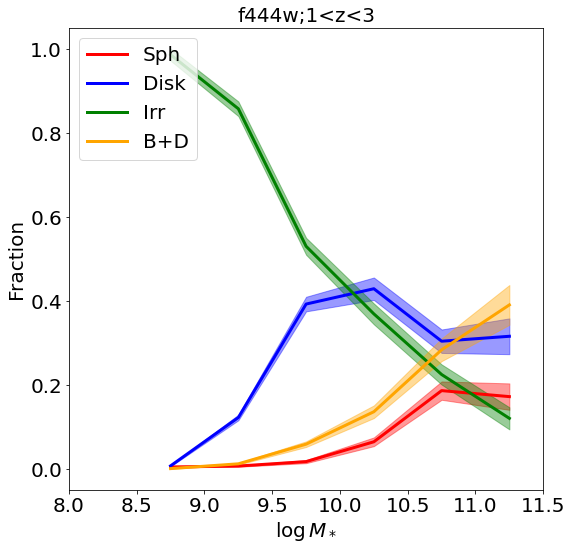

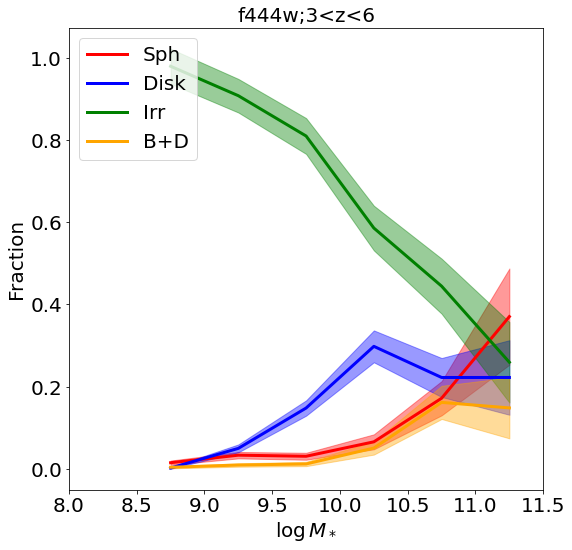

In [16]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    #plt.savefig(data_path+"morph_frac_"+str(zlow)+"f444.png")
    

[957 528 309 182 113  39]
[0.05557968 0.06203599 0.0618156  0.06593407 0.11395482 0.19700962]
[0.07190204 0.08569128 0.09352421 0.10989011 0.18693014 0.36709294]
[4876 2812 1301  601  391  174]
[0.10036353 0.1081279  0.05752102 0.08538911 0.1648491  0.12530947]
[0.10964467 0.1208906  0.07161042 0.11095033 0.20855244 0.18503536]
[540 543 426 198  99  27]
[0.17899244 0.13433631 0.07905034 0.03453395 0.09489342 0.07407407]
[0.21730385 0.16768948 0.10874309 0.06647615 0.16773284 0.22222222]


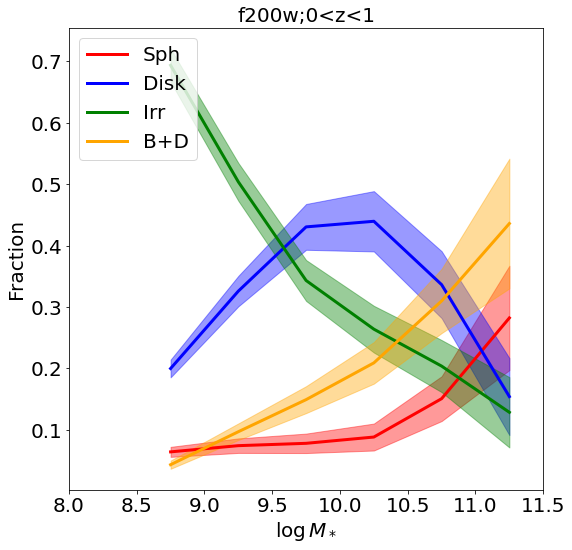

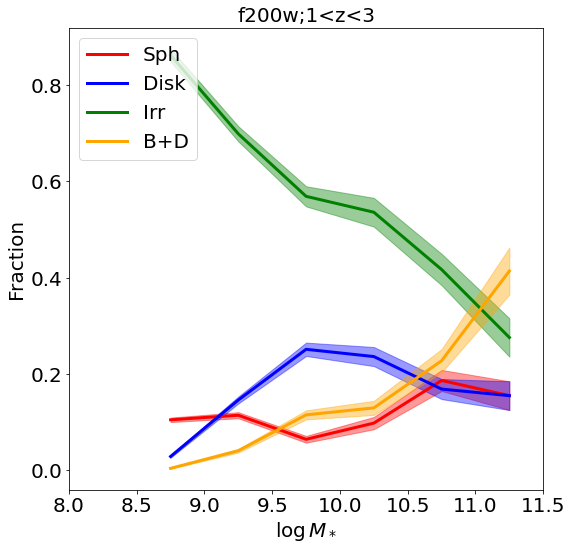

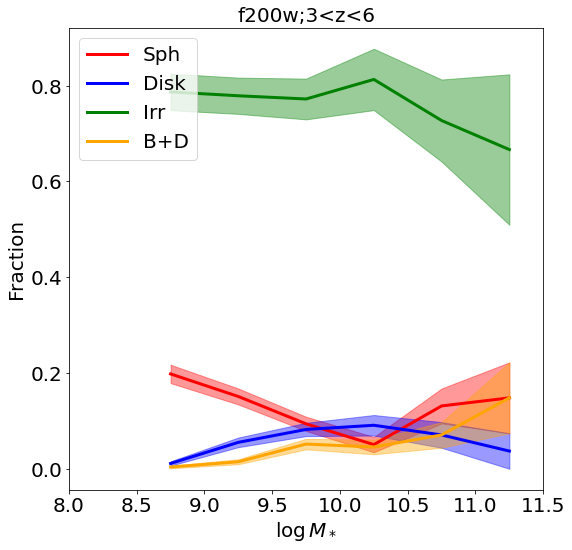

In [17]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

[  308   730  1517  3234  6226 11791]


<ipython-input-48-31eb7042686a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6


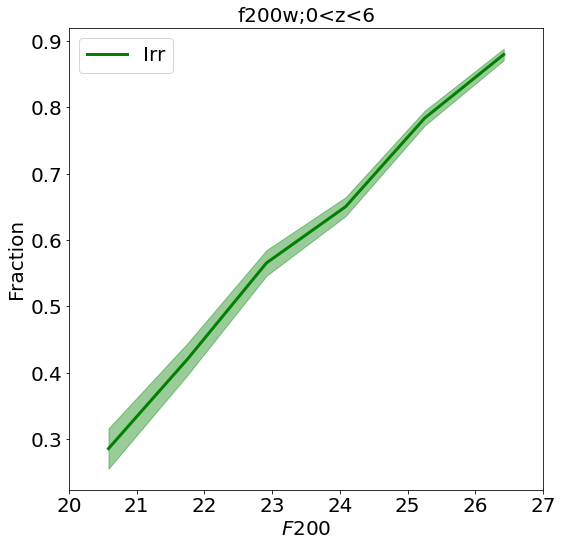

In [48]:
zbins = [0,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    mag = sel['F200_AB']
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(20,27)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mag,range=(20,27),bins=6)
    sph,bins = np.histogram(mag[(morph_flag==0)],range=(20,27),bins=6)
    dk,bins = np.histogram(mag[((morph_flag==1))],range=(20,27),bins=6)
    irr,bins = np.histogram(mag[(morph_flag==2)],range=(20,27),bins=6)
    bd,bins = np.histogram(mag[(morph_flag==3)],range=(20,27),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    #plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    #print((sph-np.sqrt(sph))/all)
    #print((sph+np.sqrt(sph))/all)
    #plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    #plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    #plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$F200$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

[ 111  195  293  445  601  945 1004  216]


<ipython-input-53-6afb226c410a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6


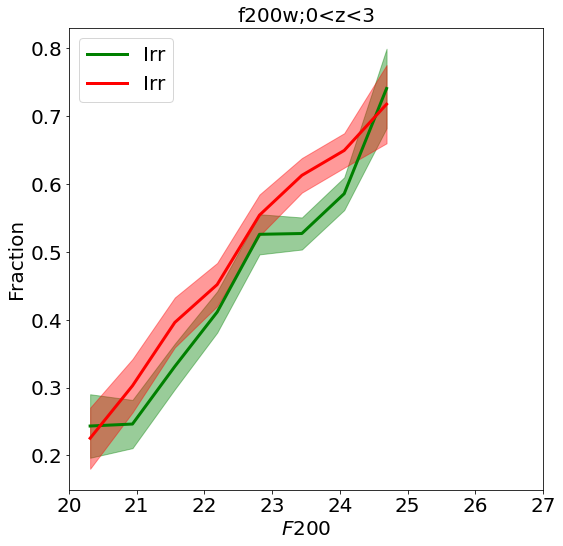

In [53]:
zbins = [0,3]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    sel["F200_AB"] = 2.5*(23-np.log10(sel.FLUX_200*1e-9))-48.6

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    mag = sel['F200_AB']
    morph_flag = sel.morph_flag_f200w
    morph_flag_c = sel.morph_CANDELS

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(20,27)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mag,range=(20,25),bins=8)
    sph,bins = np.histogram(mag[(morph_flag==0)],range=(20,25),bins=8)
    dk,bins = np.histogram(mag[((morph_flag==1))],range=(20,25),bins=8)
    irr,bins = np.histogram(mag[(morph_flag==2)],range=(20,25),bins=8)
    bd,bins = np.histogram(mag[(morph_flag==3)],range=(20,25),bins=8)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    #plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    #print((sph-np.sqrt(sph))/all)
    #print((sph+np.sqrt(sph))/all)
    #plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    #plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    #plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)


    all,bins = np.histogram(mag,range=(20,25),bins=8)
    sph,bins = np.histogram(mag[(morph_flag_c==0)],range=(20,25),bins=8)
    dk,bins = np.histogram(mag[((morph_flag_c==1))],range=(20,25),bins=8)
    irr,bins = np.histogram(mag[(morph_flag_c==2)],range=(20,25),bins=8)
    bd,bins = np.histogram(mag[(morph_flag_c==3)],range=(20,25),bins=8)

    plt.plot(bcenters,irr/all,color='red',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='red',alpha=0.4)


    #plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    #plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$F200$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")

[234 425 278 167 101  35]
[108 502 921 524 349 163]
[ 6 15 43 65 45 21]


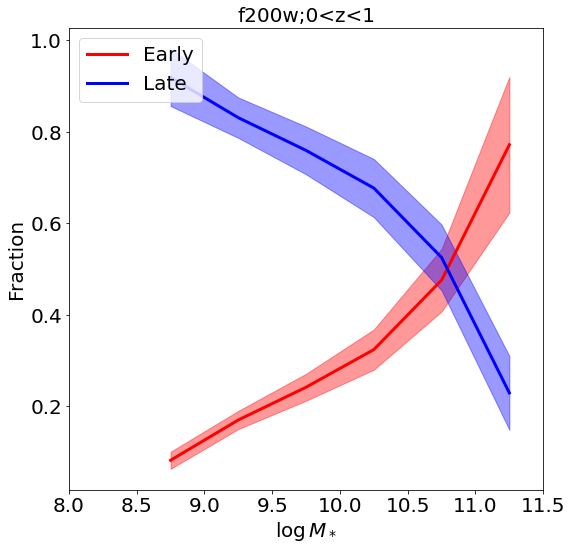

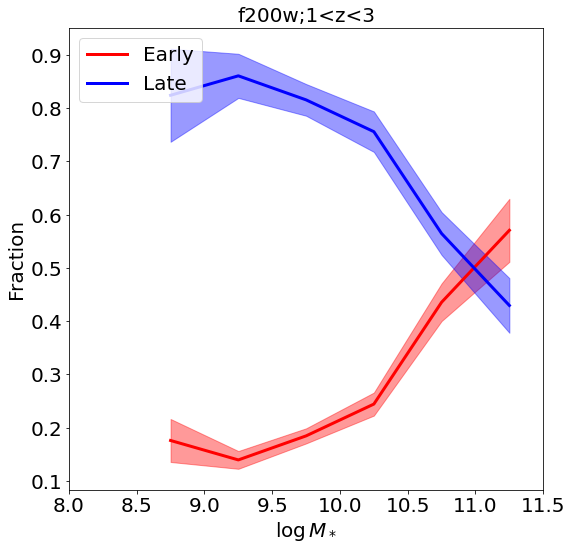

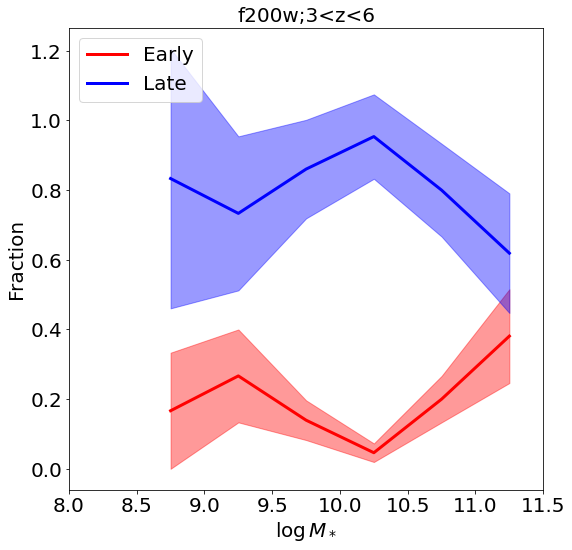

In [24]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))

    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_CANDELS-CEERS.png")

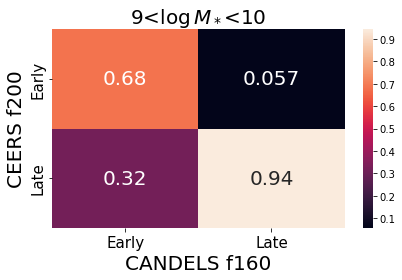

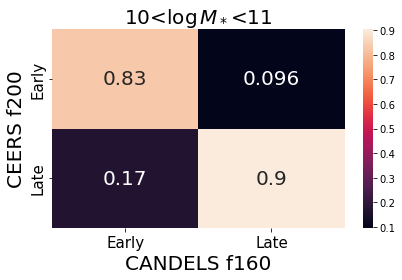

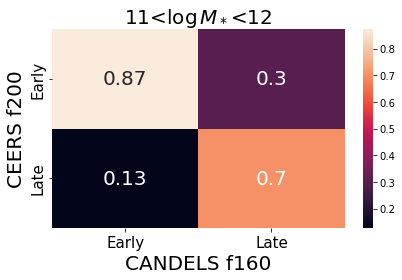

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [9,10,11,12]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and zfit_50<6 and logM_50>"+str(zlow)+"and logM_50<"+str(zup))


    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<$\log M_*$<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.tight_layout()
    plt.savefig(data_path+"conf_matrix_CANDELS_CEERS"+str(zlow)+"_mass_"+str(zup)+".png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

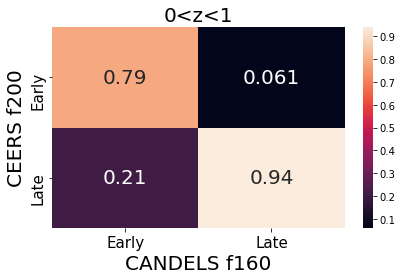

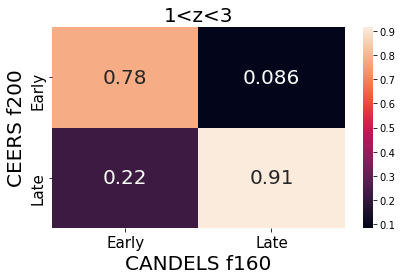

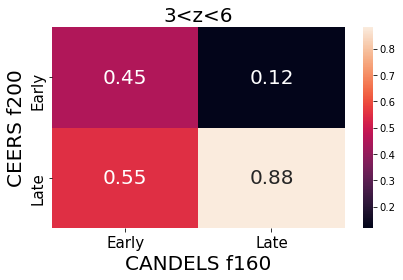

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))


    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.tight_layout()
    plt.savefig(data_path+"conf_matrix_CANDELS_CEERS"+str(zlow)+"_z_"+str(zup)+".png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

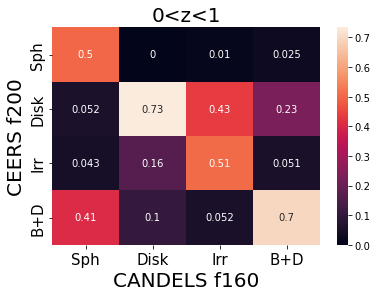

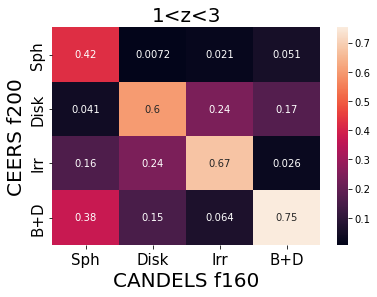

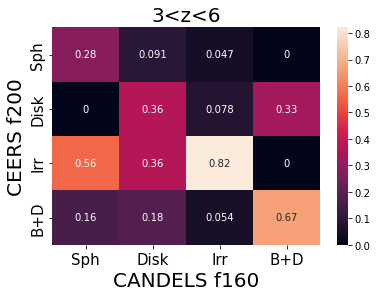

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_CANDELS,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

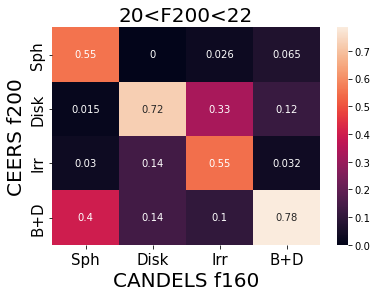

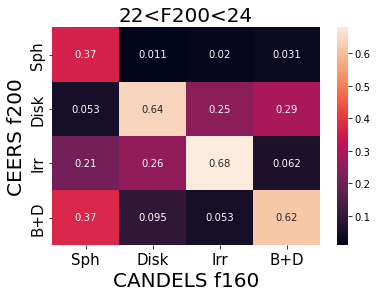

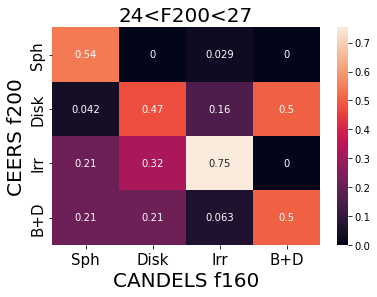

In [44]:



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [20,22,24,27]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>"+str(zlow)+"and F200_AB<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_CANDELS,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<F200<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

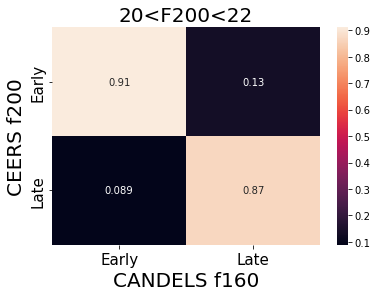

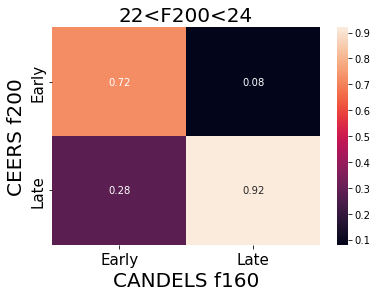

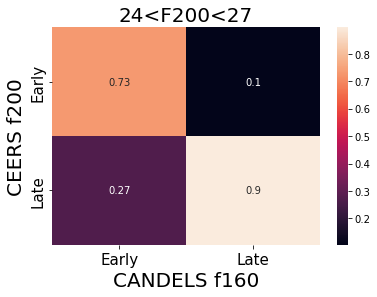

In [45]:




from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [20,22,24,27]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>"+str(zlow)+"and F200_AB<"+str(zup))

    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<F200<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()
    

[1 0 0 ... 1 1 1]
[-0.3072359  -0.83690425 -0.31219111 ... -0.46897861 -0.43397048
 -1.0010871 ]
671.0
0.016786570743405275
0.731814548361311
[ 0.          0.         -0.1         0.          0.         -0.14285714
  0.          0.         -0.16666667  0.          0.         -0.14285714
  0.          0.         -0.10416667 -0.15384615  0.         -0.08333333
 -0.03125    -0.02830189  0.0199005   0.          0.          0.15492958
  0.05147059  0.03061224  0.          0.21052632  0.12820513  0.02298851
  0.04761905  0.          0.         -0.16666667  0.07692308  0.
  0.26666667  1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.5         0.
  0.          0.          0.2         0.25        0.          0.
 -0.4         0.          0.         -0.14285714 -0.5         0.
  0.16666667  0.05882353 -0.12       -0.06666667  0.1875      0.04444444
 -0.08888889  0.08333333  0.          0.          0.03846154  0.05625
  0.05813953  0.         

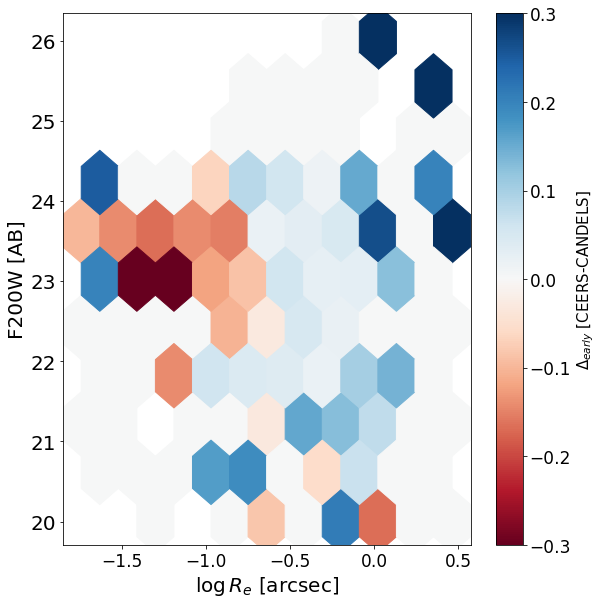

In [160]:
zbins = [20,22,24,27]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)

candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>20 and F200_AB<27 and re>0 and re<3")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_CANDELS.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=1-ceers_morph
arr[:,1]=1-candels_morph

print(ceers_morph)
#conc = np.concatenate((ceers_morph,candels_morph),axis=1)

re = np.log10(sel.re.values)
mag = sel.F200_AB.values

print(re)

print(sum(arr[:,0]))

def funct(z):
    return (np.sum(np.array(z)[:,0])-np.sum(np.array(z)[:,1]))/len(z)

def funct2(z):
    
    return 100

print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(re,mag,C=arr,reduce_C_function=funct,gridsize=10,vmin=-0.3,vmax=0.3,cmap = 'RdBu')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$\Delta_{early}$ [CEERS-CANDELS]',size=15)
print(all.get_array())
plt.xlabel("$\log R_e$ [arcsec]",fontsize=20)
plt.ylabel("F200W [AB]",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mag_re_early.png")
#plt.legend(fontsize=20,loc='upper left')
#plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

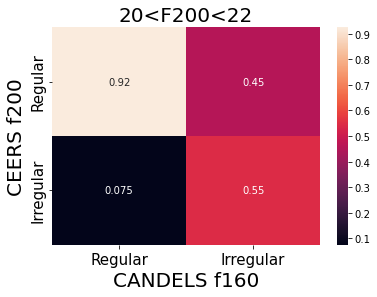

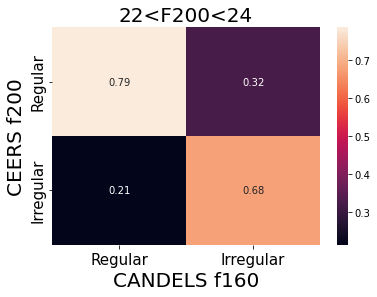

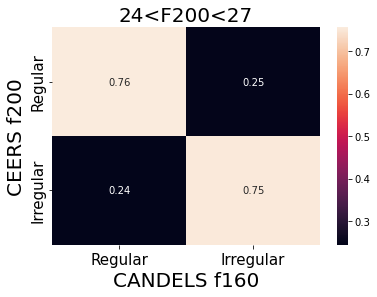

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [20,22,24,27]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
    sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>"+str(zlow)+"and F200_AB<"+str(zup))

    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==1]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==1]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<F200<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Regular","Irregular"],fontsize=15); ax.yaxis.set_ticklabels(["Regular","Irregular"],fontsize=15)
    plt.show()

[0 0 0 ... 1 1 1]
[-0.3072359  -0.83690425 -0.31219111 ... -0.46897861 -0.43397048
 -1.0010871 ]
1132.0
-0.12070343725019984
0.4524380495603517
[ 0.         -0.5         0.1         0.         -0.14285714 -0.14285714
  0.          0.          0.5        -0.4         0.          0.0952381
  0.         -0.05263158  0.04166667  0.05769231  0.          0.
 -0.03125    -0.12264151 -0.20895522  0.         -0.07692308 -0.15492958
 -0.18382353 -0.20918367 -0.2        -0.10526316 -0.20512821 -0.12643678
 -0.14285714  0.          0.          0.33333333 -0.30769231  0.
 -0.13333333 -1.         -0.5        -0.33333333 -0.25        0.
 -1.          0.          0.          0.         -0.5         0.
 -1.          0.          0.         -0.25        0.          0.
  0.2        -0.5         0.          0.28571429  0.5         0.
  0.16666667 -0.05882353  0.04        0.1        -0.25       -0.02222222
  0.01111111 -0.10416667  0.         -0.11764706 -0.15384615 -0.15625
 -0.24418605  0.         -0.1081

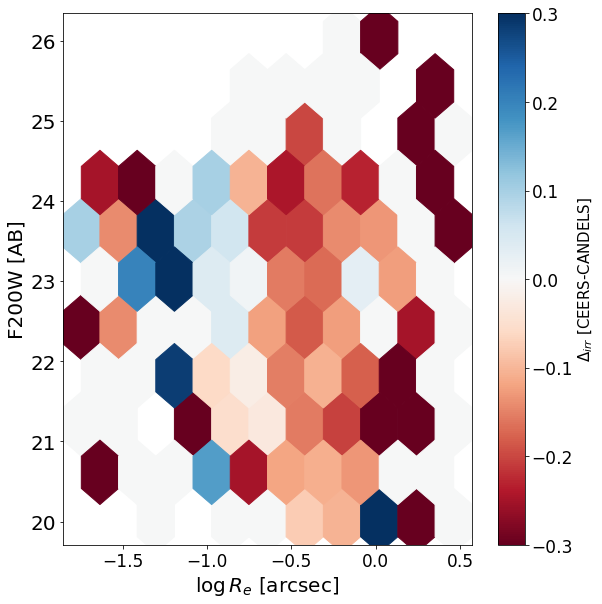

In [161]:
zbins = [20,22,24,27]


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8.5, 8.5)
#plt.xlim(0,6)
#plt.xlim(8,11.5)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)


candels_ceers["F200_AB"] = 2.5*(23-np.log10(candels_ceers.FLUX_200*1e-9))-48.6
sel = candels_ceers.query("morph_CANDELS>=0 and logM_50>9.5 and F200_AB>20 and F200_AB<27 and re>0 and re<3")

ceers_morph = sel.morph_flag_f200w.values
ceers_morph[ceers_morph==3]=0
ceers_morph[ceers_morph==1]=0
ceers_morph[ceers_morph==2]=1

candels_morph = sel.morph_CANDELS.values
candels_morph[candels_morph==3]=0
candels_morph[candels_morph==1]=0
candels_morph[candels_morph==2]=1

arr = np.zeros((len(candels_morph),2))
arr[:,0]=ceers_morph
arr[:,1]=candels_morph

print(ceers_morph)
#conc = np.concatenate((ceers_morph,candels_morph),axis=1)

re = np.log10(sel.re.values)
mag = sel.F200_AB.values

print(re)

print(sum(arr[:,0]))

def funct(z):
    return (np.sum(np.array(z)[:,0])-np.sum(np.array(z)[:,1]))/len(z)

def funct2(z):
    
    return 100

print(funct(arr))
print(np.mean(ceers_morph.astype(float)))
all=plt.hexbin(re,mag,C=arr,reduce_C_function=funct,gridsize=10,vmin=-0.3,vmax=0.3,cmap = 'RdBu')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
cb.set_label(label='$\Delta_{irr}$ [CEERS-CANDELS]',size=15)
print(all.get_array())
plt.xlabel("$\log R_e$ [arcsec]",fontsize=20)
plt.ylabel("F200W [AB]",fontsize=20)
plt.tight_layout()
plt.savefig(data_path+"hexbin_mag_re_irr.png")
#print(all.get_array())
#early_ceers=plt.hexbin(re[ceers_morph==0],mag[ceers_morph==0],bins=50,gridsize=10)
#early_candels=plt.hexbin(re[candels_morph==0],mag[candels_morph==0],bins=50,gridsize=10)

#delta = plt.hexbin(re,mag,C=(early_ceers.get_array()-early_candels.get_array())/all.get_array(),bins=50,gridsize=10)

#print(early_ceers.get_array())

[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5 ]
[ 7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.

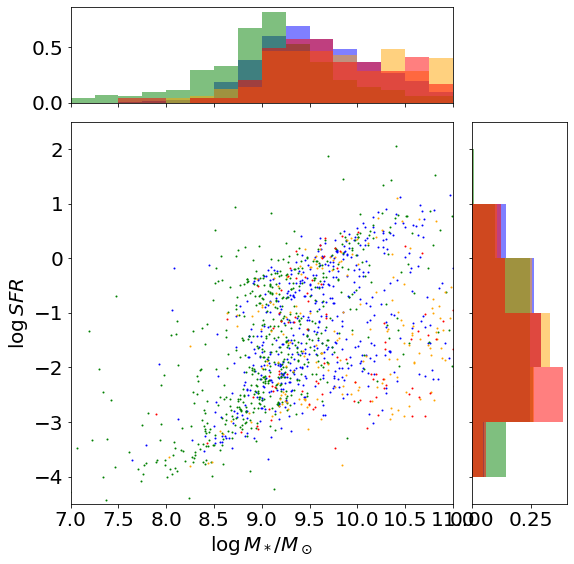

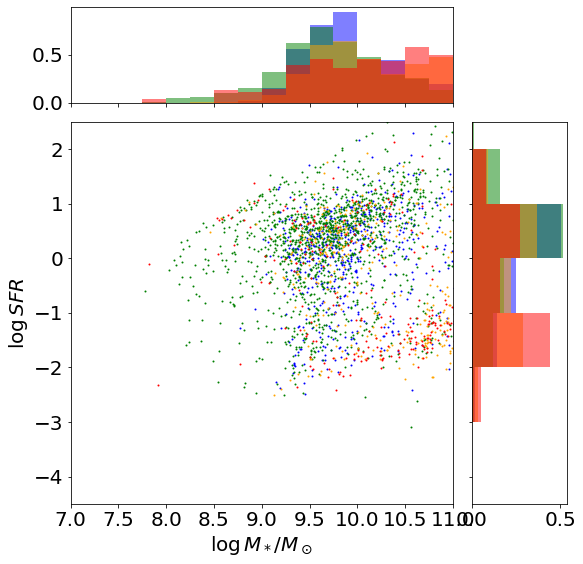

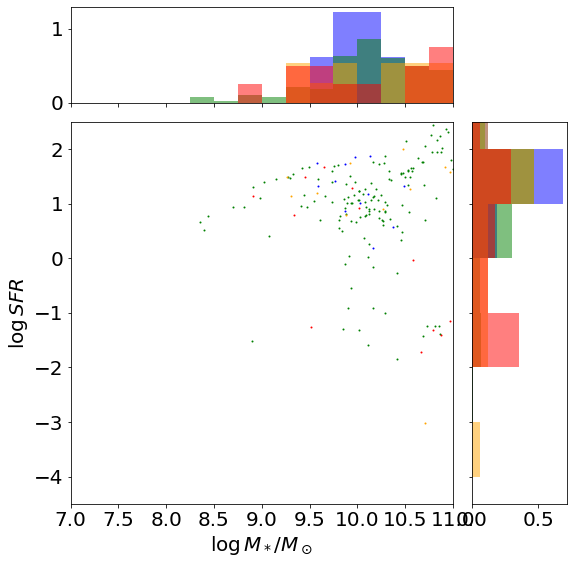

In [45]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,c='black'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color=c)

    # now determine nice limits by hand:
    binwidth_x = 0.25
    binwidth_y = 1
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(lim_x[0], lim_x[1] + binwidth_x, binwidth_x)
    bins_y= np.arange(lim_y[0], lim_y[1] + binwidth_y, binwidth_y)
    #print(bins_x)
    ax_histx.hist(x, bins=bins_x,color=c,density=True,alpha=0.5)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=c,density=True,alpha=0.5)


for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w
    fig = plt.figure()
    fig.set_size_inches(8.5, 8.5)
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)
    # Create the Axes.
    ax = fig.add_subplot(gs[1, 0])
    plt.xlim(7,11)
    plt.ylim(-4.5,2.5)
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.ylabel("$\log SFR$",fontsize=20)
    plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    # Draw the scatter plot and marginals.
    
    
    scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

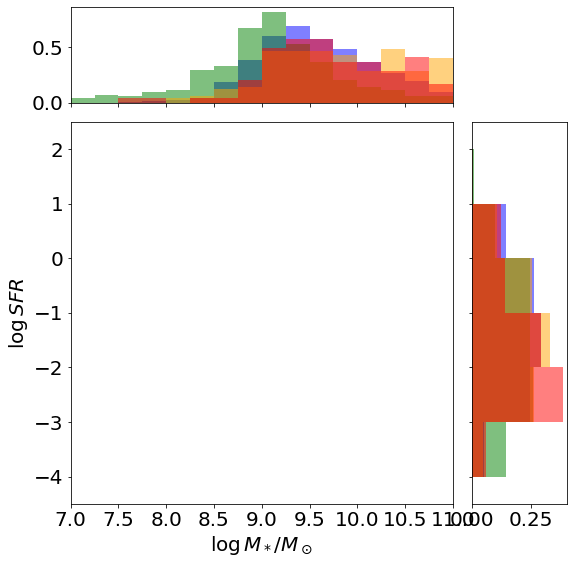

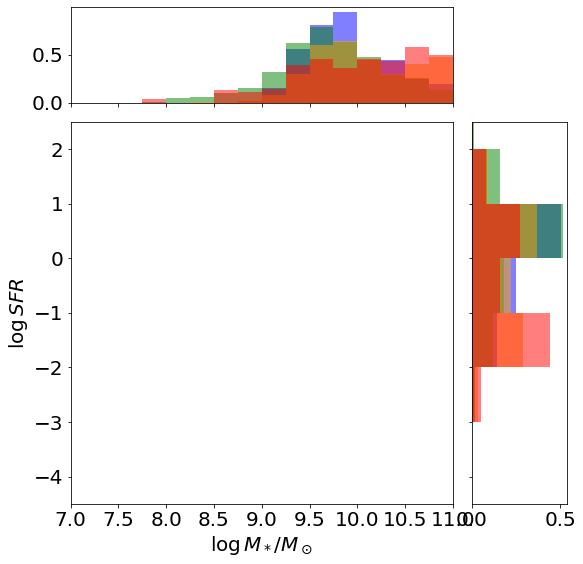

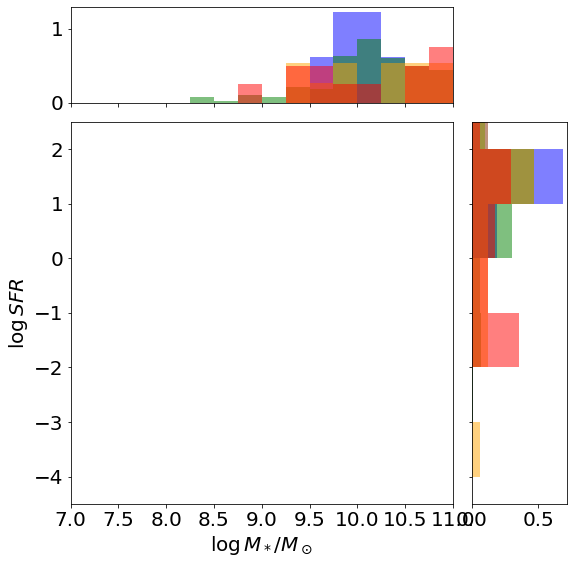

In [88]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,c='black'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    #ax.scatter(x, y,s=1,color=c)
    #ax.contour(x, y, Z, colors='black');
    #x = np.linspace(lim_x[0], lim_x[1], 50)
    #y = np.linspace(lim_y[0], lim_y[1], 40)

    #X, Y = np.meshgrid(x, y)
    # now determine nice limits by hand:
    binwidth_x = 0.25
    binwidth_y = 1
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(lim_x[0], lim_x[1] + binwidth_x, binwidth_x)
    bins_y= np.arange(lim_y[0], lim_y[1] + binwidth_y, binwidth_y)
    #print(bins_x)
    ax_histx.hist(x, bins=bins_x,color=c,density=True,alpha=0.5)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=c,density=True,alpha=0.5)


for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    morph_flag = sel.morph_flag_f200w
    fig = plt.figure()
    fig.set_size_inches(8.5, 8.5)
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)
    # Create the Axes.
    ax = fig.add_subplot(gs[1, 0])
    plt.xlim(7,11)
    plt.ylim(-4.5,2.5)
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.ylabel("$\log SFR$",fontsize=20)
    plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    # Draw the scatter plot and marginals.
    
    
    scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

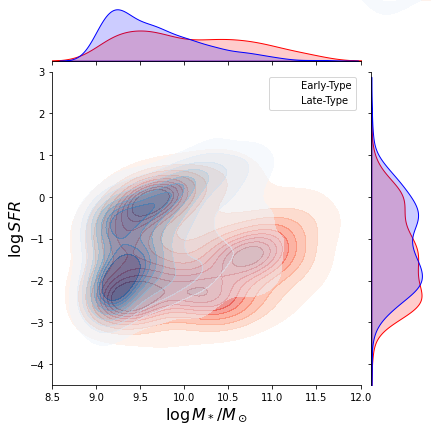

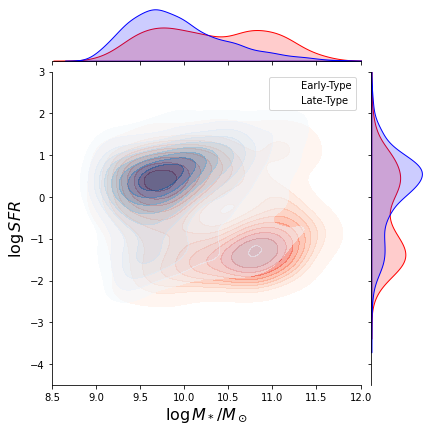

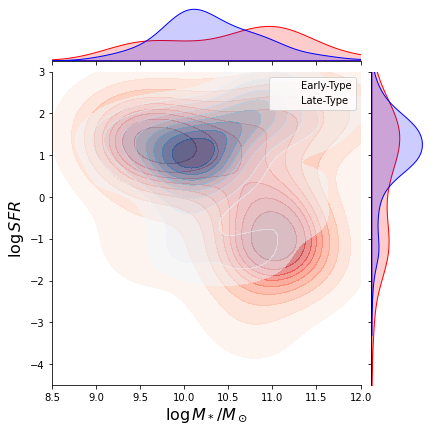

In [32]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f200w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Early-Type',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


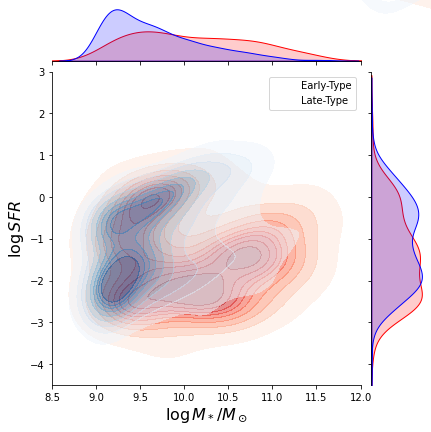

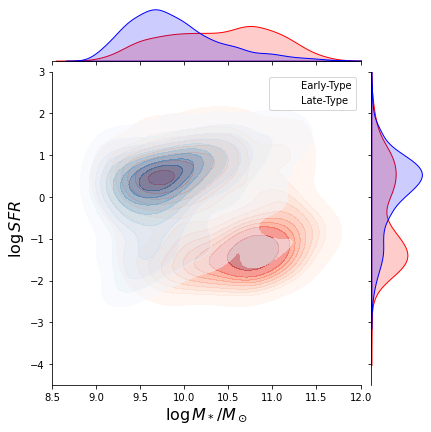

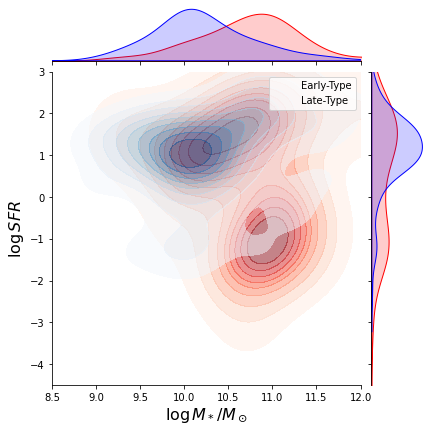

In [33]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f356w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Early-Type',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


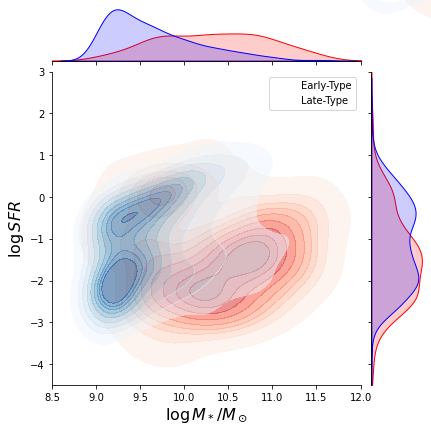

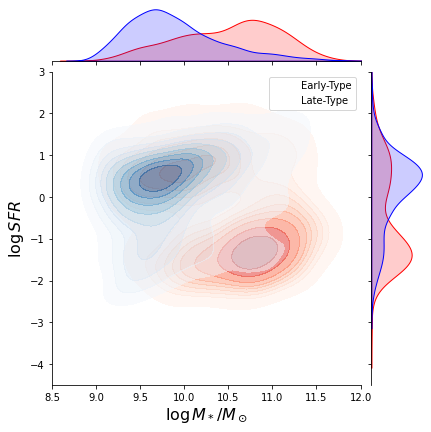

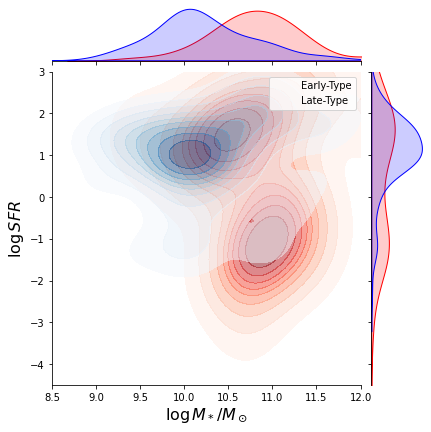

In [34]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f444w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)|(morph_flag==3)], y=SFR[(morph_flag==0)|(morph_flag==3)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Early-Type',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==1)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Late-Type') 
    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')


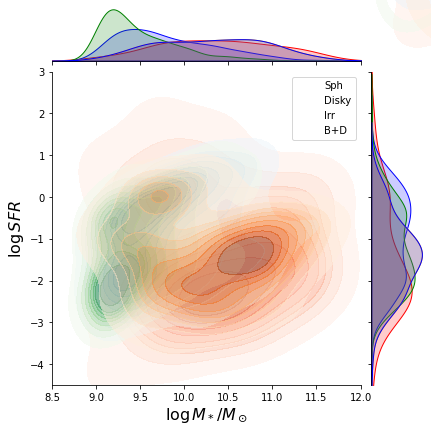

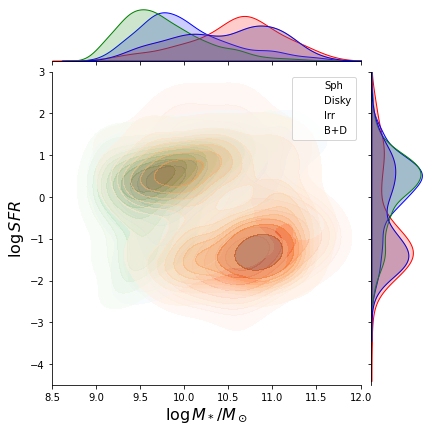

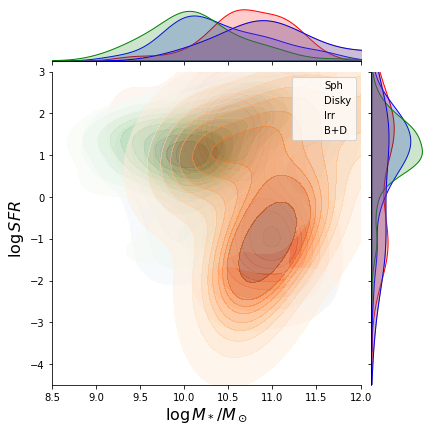

In [41]:
import seaborn as sns
zbins = [0,1,3,6]
for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("zfit_50>"+str(zlow)+"and zfit_50<"+str(zup)+" and logSFR100_50>-5 and logSFR100_50<5 and logM_50>9")
    mass=sel['logM_50']
    zbest = sel["zfit_50"]
    SFR = sel['logSFR100_50']
    morph_flag = sel.morph_flag_f444w
    #fig = plt.figure()
    #fig.set_size_inches(8.5, 8.5)
    #gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        #left=0.1, right=0.9, bottom=0.1, top=0.9,
                        #wspace=0.05, hspace=0.05)
    #sns.set(font_scale=1.5)
    # Create the Axes.
    #ax = fig.add_subplot(gs[1, 0])
    #ax=px.density_contour(sel, x="logM_50", y="logSFR100_50",marginal_x="histogram", marginal_y="histogram",color='morph_flag_f200w')
    
    graph = sns.jointplot(x=mass[(morph_flag==0)], y=SFR[(morph_flag==0)],
                 cmap="Reds", kind="kde", marginal_kws={"color":"r", "fill":"True","alpha":.2}, fill=True, thresh=0.05, alpha=.5,
                 label='Sph',color='red')

    #graph.set_axis_labels()
    #p=sns.jointplot(data=sel,x="logM_50", y="logSFR100_50",hue="morph_flag_f200w",palette=['red','blue','green','orange'],kind='kde',marginal_kws=dict(common_norm=False, fill=True))
    
    graph.x = mass[(morph_flag==1)]
    graph.y = SFR[(morph_flag==1)]
    graph.plot_joint(sns.kdeplot, cmap="Blues", fill=True, thresh=0.05, alpha=.5, label='Disky') 
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)

    graph.x = mass[(morph_flag==2)|(morph_flag==2)]
    graph.y = SFR[(morph_flag==2)|(morph_flag==2)]
    graph.plot_joint(sns.kdeplot, cmap="Greens", fill=True, thresh=0.05, alpha=.5, label='Irr') 
    graph.plot_marginals(sns.kdeplot, color='g', fill=True, alpha=.2, legend=False)

    graph.x = mass[(morph_flag==3)|(morph_flag==3)]
    graph.y = SFR[(morph_flag==3)|(morph_flag==3)]
    graph.plot_joint(sns.kdeplot, cmap="Oranges", fill=True, thresh=0.05, alpha=.5, label='B+D') 
    graph.plot_marginals(sns.kdeplot, color='orange', fill=True, alpha=.2, legend=False)


    graph.set_axis_labels(xlabel='$\log M_*/M_\odot$', ylabel='$\log SFR$',fontsize=16)
    graph.ax_marg_x.set_xlim(8.5, 12)
    graph.ax_marg_y.set_ylim(-4.5, 3)
    
    #graph.legend()
    plt.legend()
    #ax = plt.gca()
    #ax.legend(loc='lower left',fontsize=16)
    graph.plot_marginals(sns.kdeplot, color='b', fill=True, alpha=.2, legend=False)
    #palette=['red','blue','green','orange']
    #hue="morph_flag_f200w"
    #plt.xlim(7,11)
    #plt.ylim(-4.5,2.5)
    #plt.xticks(fontsize=20, rotation=0)
    #plt.yticks(fontsize=20, rotation=0)
    #plt.ylabel("$\log SFR$",fontsize=20)
    #plt.xlabel("$\log M_*/M_\odot$",fontsize=20)
    #ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    #ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    #ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
    #ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
    #ax.show()
    # Draw the scatter plot and marginals.
    
    
    #scatter_hist(sel.logM_50[morph_flag==1], sel.logSFR100_50[morph_flag==1], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='blue')
    #scatter_hist(sel.logM_50[morph_flag==2], sel.logSFR100_50[morph_flag==2], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='green')
    #scatter_hist(sel.logM_50[morph_flag==3], sel.logSFR100_50[morph_flag==3], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='orange')
    #scatter_hist(sel.logM_50[morph_flag==0], sel.logSFR100_50[morph_flag==0], ax, ax_histx, ax_histy,[7,11.5],[-4,6],c='red')
